## Machine Learning in insurance


### Machine Learning (ML) is all about programming the unprogrammable. For example, if you want to predict an insurance price, ML helps to predict the price. An insurance price depends on various features such as age, type of coverage, amount of coverage needed, gender, body mass index (BMI), region, and other special factors like smoking to determine the price of the insurance.

### Traditionally most insurance companies employ actuaries to calculate the insurance premiums. Actuaries are business professionals who use mathematics and statistics to assess the risk of financial loss and predict the likelihood of an insurance premium and claim, based on the factors/features like age and gender, etc. They typically produce something called an actuarial table provided to an insurance company’s underwriting department, which uses the input to set insurance premiums. The insurance company calculates and writes all the programs, but it becomes much simpler by using Machine Learning.

### Machine Learning allows a program to learn from a set of data to figure out particular problem characteristics. The ML program looks at different factors like gender, smoking, the number of children, and region to find the overall highest medical charges and determine the price by using specific algorithms based upon the requirement. Smokers and customers with more children tend to have higher medical costs. Hence premiums will be more for those groups. As ML trains more and more data, the ML program becomes more intelligent and smarter in predicting the exact price. In the end, you have a function/program to call to get the insurance premium for a particular person based upon the input factors provided. You don’t need to write all of these constructs yourself. ML program looks at all the sets of data provided and trains/learns, and it gives a function, and this function is a machine learning model that you can use in your application.


## Abstract :-


### Insurance is a policy that eliminates or decreases loss costs occurred by various risks. Various factors influence the cost of insurance. These considerations contribute to the insurance policy formulation. Machine learning (ML) for the insurance industry sector can make the wording of insurance policies more efficient. This study demonstrates how different models of regression can forecast insurance costs. And we will compare the results of models, for example, Linear Regression, Decision tree, Random Forest Regressor, Ridge regression

## Dataset:-


### The medical cost personal datasets are obtained from the KAGGLE repository. This dataset contains seven attributes.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### For some general information about data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.shape

(1338, 7)

### The dataset that I am using for the task of health insurance premium prediction is collected from Kaggle.it has 1338 Data items/points and It contains data about:

#### 1.The age of the person
#### 2.Gender of the person
#### 3.Body Mass Index of the person
#### 4.How many children the person is having
#### 5.Whether the person smokes or not
#### 6.The region where the person live 
#### 7.Charges of the insurance premium




### Before moving forward, let’s have a look at whether this dataset contains any null values or not:

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### There are no missing values as such

### This means we don’t have to worry about imputation or dropping rows or columns with missing data

### now for counting the number of elements in different features 

In [8]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [9]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

### Categorical Features:
 (1).Sex
 (2).Smoker
 (3).Region

### Note: Regression algorithms seem to be working on features represented as numbers only By looking at our dataset we see that columns — ‘sex’, ‘smoker’ and ‘region’ are in string format, so we can work on converting them to numerical values as below 

### Converting Categorical Features to Numerical

In [10]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [11]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [12]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## Feature Engineering and Correlation Matrix:-

Text(0.5, 1.0, 'Dependencies of Medical Charges')

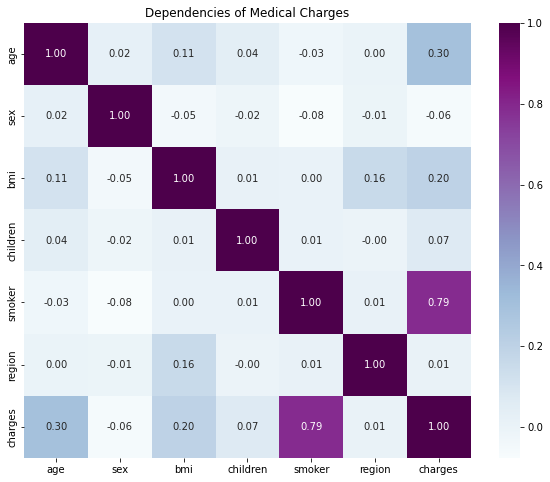

In [14]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")


<Figure size 432x432 with 0 Axes>

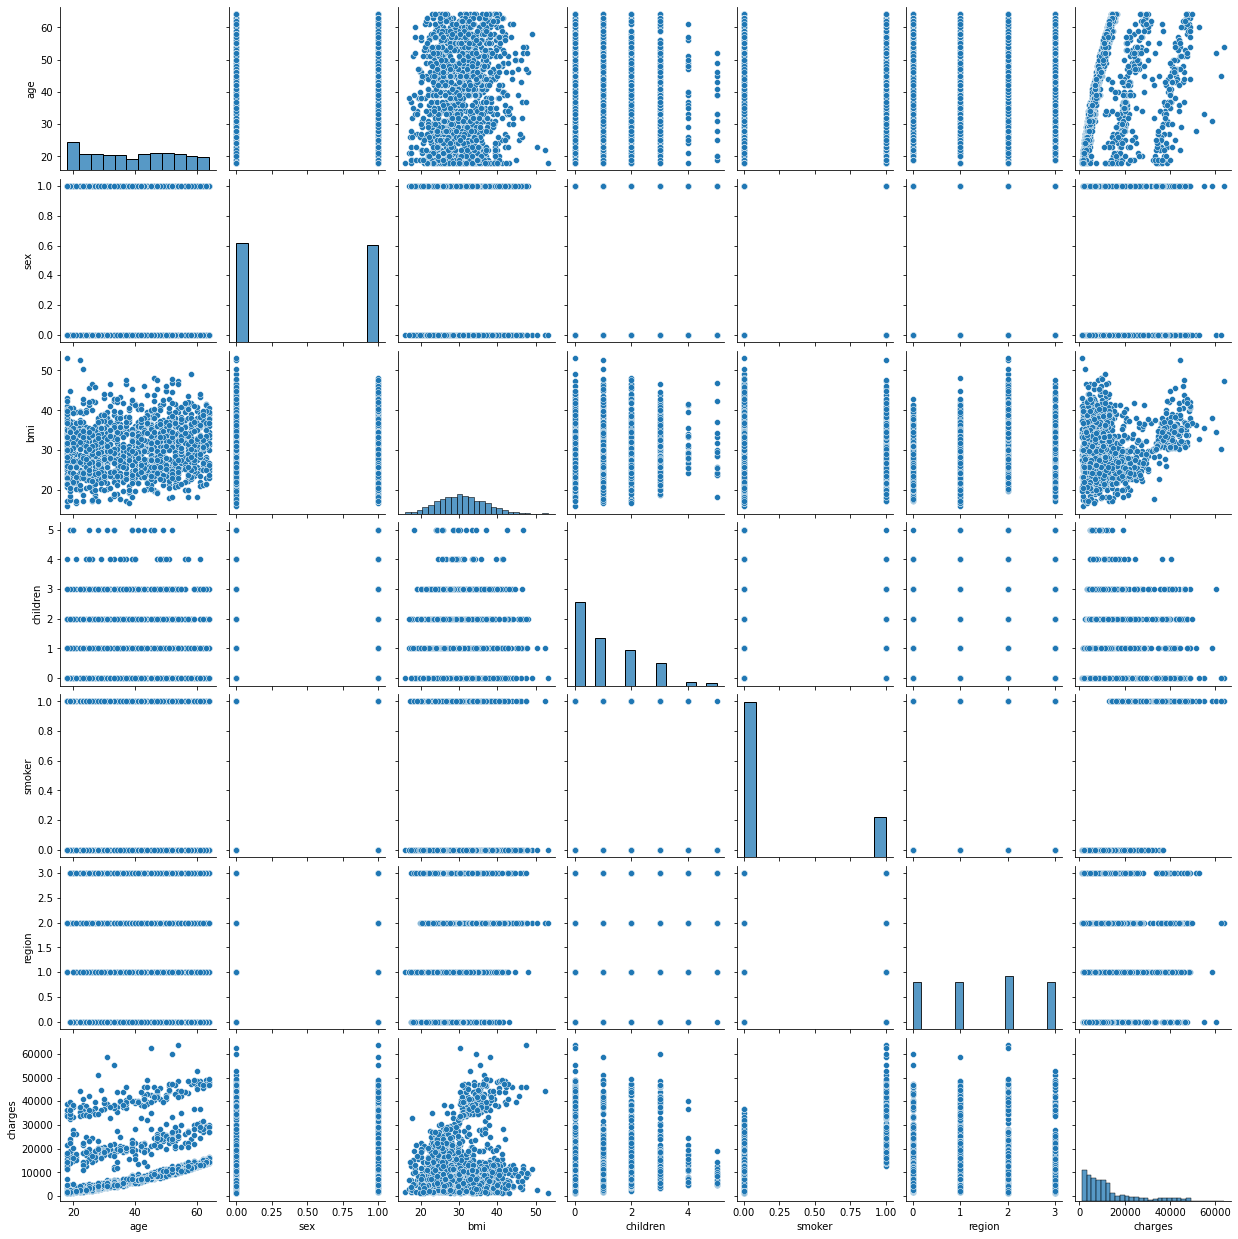

In [15]:
plt.figure(figsize=(6,6))
sns.pairplot(data_copy)

### When it comes to machine learning, feature engineering is the process of extracting features from raw data while applying domain expertise in order to improve the performance of ML algorithms. In the medical insurance cost dataset, attributes such as smoker, BMI, and age are the most important factors that determine charges. Also, we see that sex, children, and region do not affect the charges. We might drop these 3 columns as they have less correlation by plotting the heat map graph to see the dependency of dependent value on independent features. The heat map makes it easy to identify which features are most related to the other features or the target variable. Outcomes are shown in above Figure



## Results and Analysis:-
### The results of applied ML models are discussed in this section. Now for this, we can proceed with exploratory data analysis for plotting feature vs. feature (charges) for data visualization.

In [12]:
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


### Now we are confirmed that there are no other values in above pre-preocessed column, We can proceed with EDA

## Age vs. Charges

<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

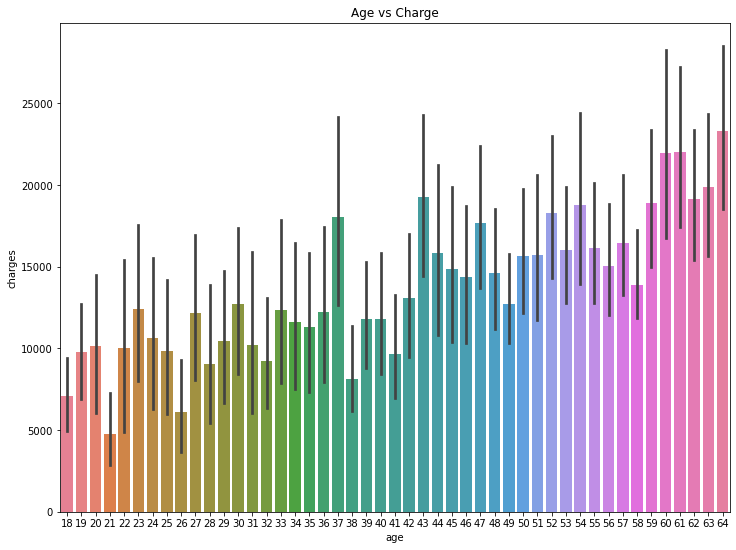

In [14]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')


### We can see in figure that with the growing age, the insurance charges are going to be increased. For example, when the age touches 64, the insurance charge is 23000, as shown in Figure .Age is shown on the x-axis, and charges are given on the y-axis

## Region vs charges:-

<AxesSubplot:title={'center':'Region vs Charge'}, xlabel='region', ylabel='charges'>

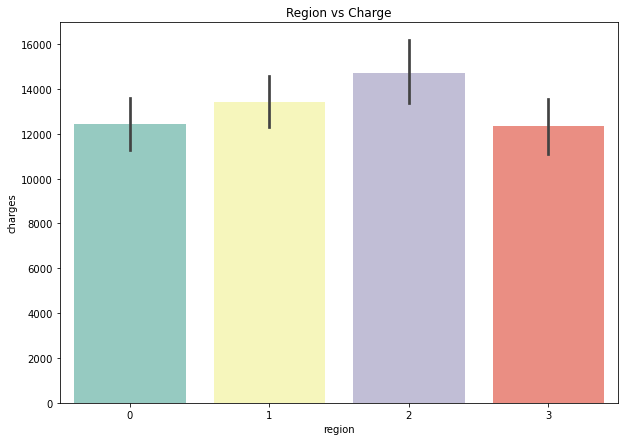

In [13]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')

### Insurance charges vary concerning certain regions as shown in Figure The health insurance charges in the southeast are greater than in other regions. The region is displayed on the x-axis, and charges are shown on the y-axis.

## BMI vs Charges

Text(0.5, 1.0, 'BMI VS Charge')

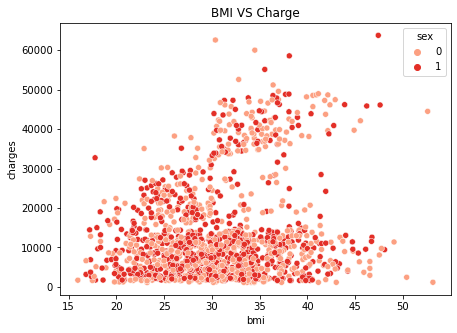

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

### In this Figure the zero value is used to represent the females and one value is used for the males. The BMI values of sex or gender types (male and female) are given in the x-axis, and the charges are presented in the y-axis. It can be clearly seen that when the values of BMI are varied, the insurance charges will vary accordingly as shown in Figure .




## Smoker vs Charge

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

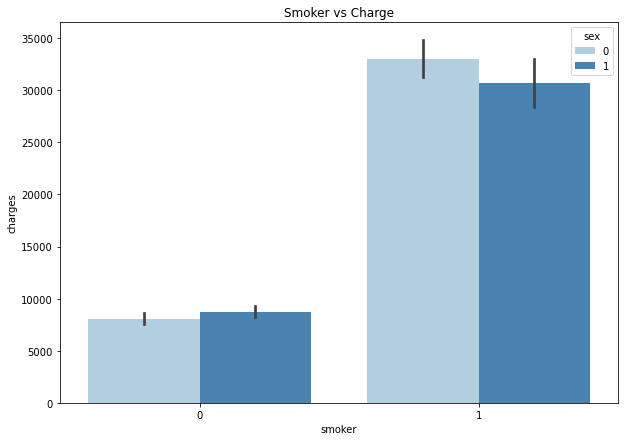

In [15]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

### The Figure illustrates that as a normal smoker, the medical insurance cost varies slightly. However, men are more addicted and passionate to smoking as compared to women so the health insurance cost for females is greater as compared to the males. We can see in Figure that with the increase of smoking habits, the insurance charges are going to be decreased for men and increased for women. Smokers’ values are shown on the x-axis, and charges are shown on the y-axis.







##  Sex vs. Charges


<AxesSubplot:title={'center':'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

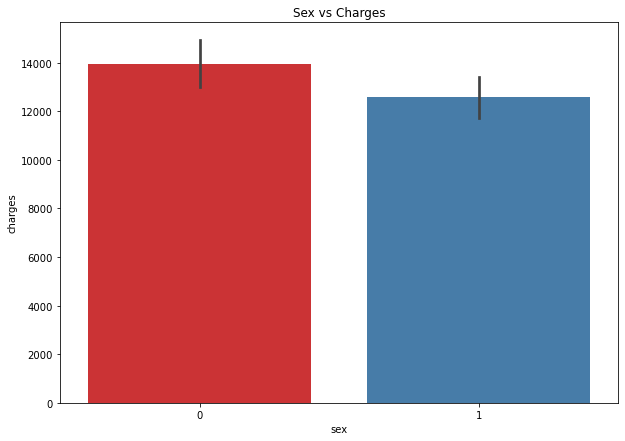

In [16]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

### The medical insurance charges for the female gender are always greater than for the male as shown in Figure. It gives the sex types on the x-axis and the charges on the y-axis. The figure illustrates that the insurances charges for the female are 14000, and for the male, the charges are around 13000.

### For Boxplot

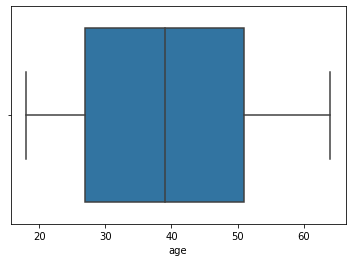

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


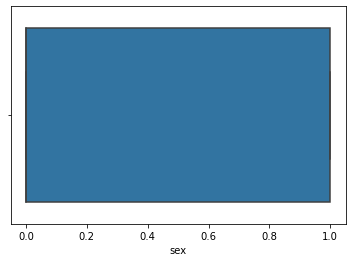

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


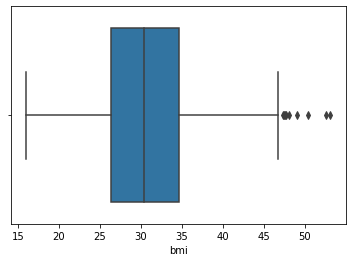

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


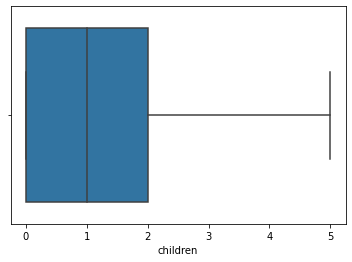

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


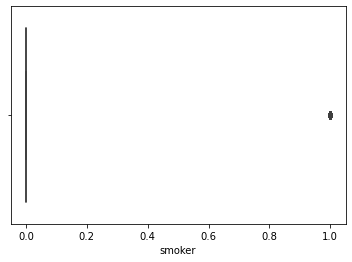

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


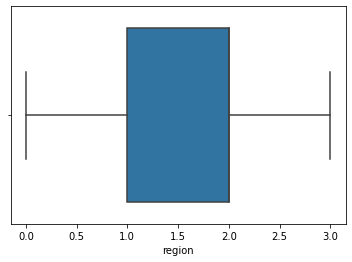

In [33]:
for i in range(0,6):
    sns.boxplot(data_copy.iloc[:,i])
    plt.show()



## Skewness and Kurtosis

### Skewness is a metric that quantifies symmetry in a given scenario, or more specifically, the lack of it. If a distribution or data set appears the same on all sides of the graph to the left and right of the centre point, it is said to be symmetric. Kurtosis is a measure of how heavy-tailed or light-tailed the data are when compared to the normal distribution, according to the normal distribution. Heavy tails or outliers are more probable in data sets with a high kurtosis than data sets with a low kurtosis. When there is a low kurtosis in a data collection, it is more likely that there will be no outliers . The most extreme instance would be if there is a uniform distribution. Table displays the values for the skew and kurtosis of the attributes of a medical dataset.

In [17]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


In [18]:
table = pd.DataFrame( {'skewness':data_copy.skew(), 'kurtosis': data_copy.kurt()})

In [19]:
print(table)

          skewness  kurtosis
age       0.055673 -1.245088
sex       0.020951 -2.002557
bmi       0.284047 -0.050732
children  0.938380  0.202454
smoker    1.464766  0.145756
region   -0.037853 -1.329359
charges   1.515880  1.606299


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

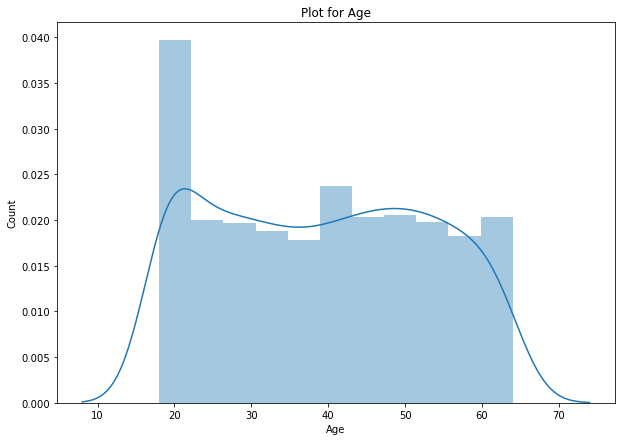

In [20]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

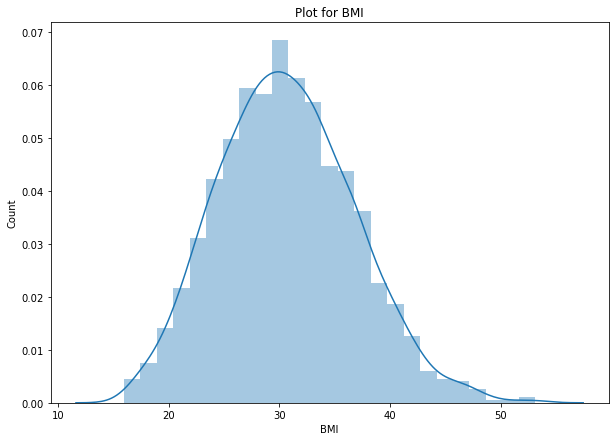

In [21]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

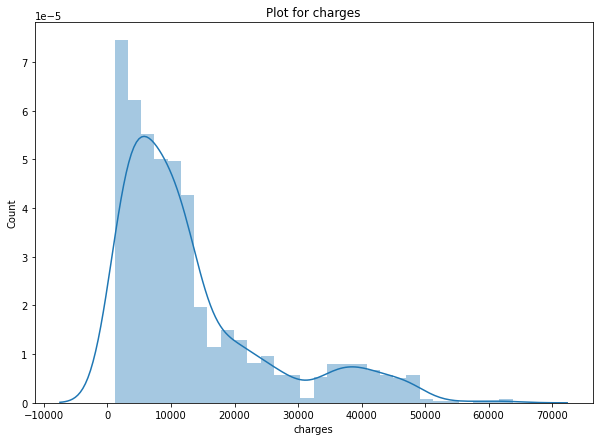

In [22]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

### There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually!

### Preparing data - We can scale BMI and Charges Column before proceeding with Prediction

In [17]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


###  Next we will split our dataset(insurance.csv) into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model(Predict ‘y’ variable). Please note that we will also compare the testing set predicted results with actual results.

In [24]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [38]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)
LinearRegression()
from sklearn.metrics import r2_score
y_pred1=model1.predict(X_test)
rscore1=r2_score(y_test,y_pred1)
rscore1


0.7826938736089379

In [39]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              429.2
Date:                Sat, 17 Sep 2022   Prob (F-statistic):                   5.61e-280
Time:                        18:30:39   Log-Likelihood:                         -852.30
No. Observations:                1070   AIC:                                      1717.
Df Residuals:                    1064   BIC:                                      1746.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2990      0.017     18.016      0.000       0.266       0.332
x2            -0.1607      0.030     -5.430      0.000      -0.219      -0.103
x3             0.1844      0.017     10.946      0.000       0.151       0.217
x4            -0.0288      0.012     -2.341      0.019      -0.053      -0.005
x5             1.8427      0.040     46.516      0.000       1.765       1.920
x6            -0.1194      0.012    -10.066      0.000      -0.143      -0.096
==============================================================================
Omnibus:                      218.666   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.853
Skew:                           1.181   Prob(JB):                     3.74e-95
Kurtosis:                       5.044   Cond. No.                         5.43
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumptions of linear regression

### 1.Checking for normality of residuals

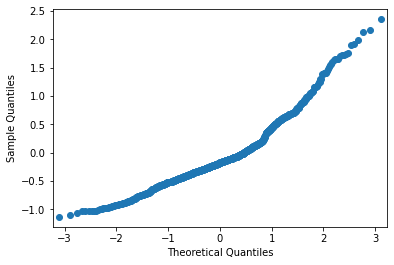

-0.08111519661734773

In [40]:
residuals = lin_reg.resid
sm.qqplot(residuals)
plt.show()
np.mean(residuals)

### from this graph,we can conclude that the residuals are normally distributed

## 2.Checking for homoscedasticity

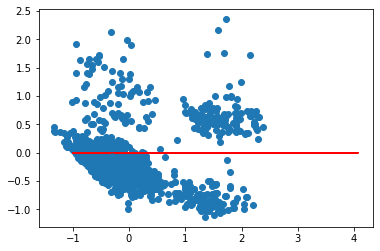

In [41]:
plt.scatter(lin_reg.predict(X_train), residuals)
plt.plot(y_train, [0]*len(y_train),c='r')

### from the above graph we can say that data is homoscedasticity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [47]:
X1=pd.DataFrame(X_train)
VIF=calc_vif(X1)
print(X1)

             0    1         2    3    4    5
0     0.483668  1.0 -1.757474  2.0  0.0  0.0
1     0.554869  1.0 -1.040599  0.0  0.0  1.0
2     0.910875  1.0 -0.952015  0.0  0.0  2.0
3    -0.014740  1.0  0.599846  5.0  0.0  2.0
4     1.053277  1.0 -1.508126  3.0  0.0  0.0
...        ...  ...       ...  ...  ...  ...
1065 -1.509965  1.0  0.112633  4.0  0.0  1.0
1066 -0.014740  1.0 -1.114419  5.0  0.0  2.0
1067  1.338082  0.0 -0.900341  0.0  0.0  1.0
1068 -0.157143  1.0  2.778356  2.0  1.0  3.0
1069  1.124479  0.0 -0.125231  0.0  0.0  3.0

[1070 rows x 6 columns]


In [48]:
print(VIF)

   variables       VIF
0          0  1.021219
1          1  1.579170
2          2  1.030209
3          3  1.509693
4          4  1.191969
5          5  1.833101


## For training and testing the models:


## LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [20]:
print('Train Score: ', lr.score(X_train, y_train))  
print('Test Score: ', lr.score(X_test, y_test))

Train Score:  0.741410450107627
Test Score:  0.7826938736089379


## DecisionTreeRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [47]:
print('Train Score: ', dt.score(X_train, y_train))  
print('Test Score: ', dt.score(X_test, y_test))

Train Score:  0.9983078124756305
Test Score:  0.7463841926097232


## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

C:\Users\sagar\AppData\Local\Temp\ipykernel_19340\4219496434.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [49]:
print('Train Score: ', rf.score(X_train, y_train))  
print('Test Score: ', rf.score(X_test, y_test))

Train Score:  0.9751228535431922
Test Score:  0.8651392191508829


## Support Vector Machine (Regression)

In [50]:
from sklearn.svm import SVR
svr= SVR(kernel = 'rbf' , C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train,y_train)
y_pred_svr=svr.predict(X_test)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print('Train Score: ', svr.score(X_train, y_train))  
print('Test Score: ',svr.score(X_test, y_test))

Train Score:  0.8532767907025472
Test Score:  0.8670398509353031


## Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred_r=ridge.predict(X_test)

In [53]:
print('Train Score: ', ridge.score(X_train, y_train))  
print('Test Score: ', ridge.score(X_test, y_test))

Train Score:  0.7413895579041571
Test Score:  0.7824286042549382


## GradientBoostingRegressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
print('Train Score: ', gb.score(X_train, y_train))  
print('Test Score: ',gb.score(X_test, y_test))

Train Score:  0.8991506267909608
Test Score:  0.8791641711092454


In [56]:
ab=[np.array([20,1,28,0,1,3])]
ab

[array([20,  1, 28,  0,  1,  3])]

In [57]:
a =dt.predict(np.array(ab))
print(a)

[2.99923879]


In [58]:
models = [('Linear Regression',lr.score(X_train, y_train),lr.score(X_test, y_test)),
          ('Decision Tree Regression',dt.score(X_train, y_train),dt.score(X_test, y_test)),
          ('Random Forest Regression',rf.score(X_train, y_train),rf.score(X_test, y_test)),
          ('Support Vector Regression',svr.score(X_train, y_train),svr.score(X_test, y_test)),
          ('Ridge Regression',ridge.score(X_train, y_train),ridge.score(X_test, y_test)),
          ('Gradient Boosting Regression',gb.score(X_train, y_train),gb.score(X_test, y_test))
         ]

In [59]:
predict = pd.DataFrame(data = models, columns=['Model', 'R2_Score(training)', 'R2_Score(test)'])
predict

,Model,R2_Score(training),R2_Score(test)
0,Linear Regression,0.741410,0.782694
1,Decision Tree Regression,0.998308,0.746384
2,Random Forest Regression,0.975123,0.865139
3,Support Vector Regression,0.853277,0.867040
4,Ridge Regression,0.741390,0.782429
5,Gradient Boosting Regression,0.899151,0.879164


# Conclusion:

##  Used different Regression techniques like Random Forest,Decesion Tree , Linear Regression,Gradient boosting with best accuracy to predict the medical insurance cost prediction and from the EDA i conclude that if you have greater BMI or if You are a smoker then your health insurance cost wlil be higher and also your age also impacts the insurance cost .